# All Classification Algorithms learnt so far

In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("World Energy Consumption.csv")
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [50]:
df["Total Electricity"] = (
    df["biofuel_electricity"] +
    df["electricity_generation"] +
    df["fossil_electricity"] +
    df["gas_electricity"] +
    df["hydro_electricity"]
)

df = df[df["year"] == 2000]
df = df[['population', 'gdp', 'Total Electricity']]
df.dropna(inplace = True)
df

,population,gdp,Total Electricity
123,1.954299e+07,1.128379e+10,0.94
566,3.182027e+06,1.521426e+10,9.38
688,3.077462e+07,2.085541e+11,69.45
853,1.639407e+07,2.351202e+10,2.80
1060,3.707077e+07,5.364810e+11,210.45
...,...,...,...
21296,7.900114e+07,2.196489e+11,57.48
21609,6.148899e+09,5.986666e+13,30032.65
21652,1.862870e+07,7.775042e+10,6.42
21867,9.891140e+06,1.496412e+10,15.52


In [51]:
median_electricity = df['Total Electricity'].mean()
df['class'] = df['Total Electricity'].apply(lambda x : 0 if x < median_electricity else 1)
df

,population,gdp,Total Electricity,class
123,1.954299e+07,1.128379e+10,0.94,0
566,3.182027e+06,1.521426e+10,9.38,0
688,3.077462e+07,2.085541e+11,69.45,0
853,1.639407e+07,2.351202e+10,2.80,0
1060,3.707077e+07,5.364810e+11,210.45,0
...,...,...,...,...
21296,7.900114e+07,2.196489e+11,57.48,0
21609,6.148899e+09,5.986666e+13,30032.65,1
21652,1.862870e+07,7.775042e+10,6.42,0
21867,9.891140e+06,1.496412e+10,15.52,0


In [52]:
from sklearn.model_selection import train_test_split

X = df[["population", "gdp"]]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(130, 2) (130,)
(33, 2) (33,)


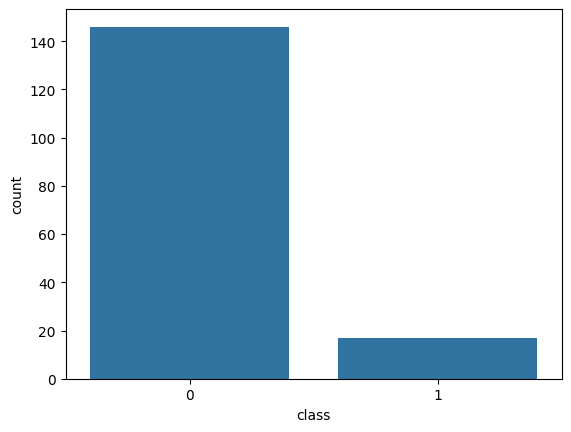

In [53]:
sb.countplot(x = y)
plt.show()

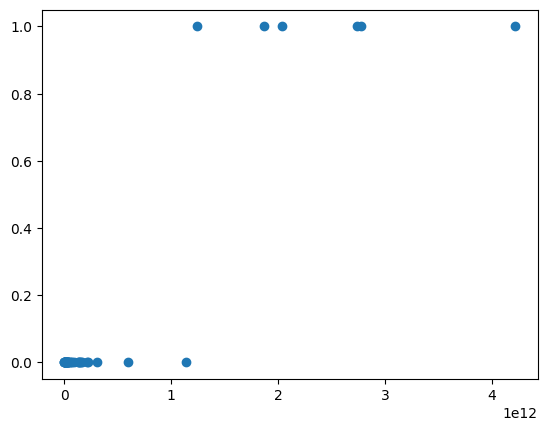

In [54]:
plt.scatter(X["gdp"][50:100], y[50:100])
plt.show()

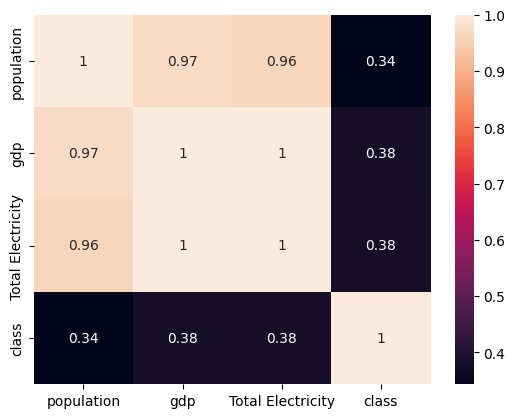

In [55]:
sb.heatmap(df.corr(), annot=True)
plt.show()

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_test, y_test)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy: 96.97%


In [57]:
# SLP
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(1, activation="sigmoid", input_shape=(X_train.shape[1],))
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=120, batch_size=32, validation_split=0.2)

Epoch 1/120
4/4 [==============================] - 1s 102ms/step - loss: 0.6147 - accuracy: 0.8173 - val_loss: 0.5880 - val_accuracy: 0.8077
Epoch 2/120
4/4 [==============================] - 0s 21ms/step - loss: 0.6124 - accuracy: 0.8173 - val_loss: 0.5857 - val_accuracy: 0.8077
Epoch 3/120
4/4 [==============================] - 0s 23ms/step - loss: 0.6101 - accuracy: 0.8173 - val_loss: 0.5835 - val_accuracy: 0.8077
Epoch 4/120
4/4 [==============================] - 0s 23ms/step - loss: 0.6079 - accuracy: 0.8173 - val_loss: 0.5812 - val_accuracy: 0.8077
Epoch 5/120
4/4 [==============================] - 0s 24ms/step - loss: 0.6056 - accuracy: 0.8173 - val_loss: 0.5789 - val_accuracy: 0.8077
Epoch 6/120
4/4 [==============================] - 0s 22ms/step - loss: 0.6033 - accuracy: 0.8269 - val_loss: 0.5766 - val_accuracy: 0.8462
Epoch 7/120
4/4 [==============================] - 0s 21ms/step - loss: 0.6011 - accuracy: 0.8269 - val_loss: 0.5744 - val_accuracy: 0.8846
Epoch 8/120
4/4 [==

In [58]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

2/2 [==============================] - 0s 16ms/step - loss: 0.3436 - accuracy: 0.9697
Test Accuracy: 96.97%


In [59]:
# MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 2s 102ms/step - loss: 0.7124 - accuracy: 0.1346 - val_loss: 0.6948 - val_accuracy: 0.4615
Epoch 2/50
4/4 [==============================] - 0s 22ms/step - loss: 0.6849 - accuracy: 0.8365 - val_loss: 0.6736 - val_accuracy: 0.9231
Epoch 3/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6655 - accuracy: 0.9519 - val_loss: 0.6554 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6497 - accuracy: 0.9712 - val_loss: 0.6373 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6335 - accuracy: 0.9712 - val_loss: 0.6183 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6162 - accuracy: 0.9712 - val_loss: 0.5980 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 23ms/step - loss: 0.5983 - accuracy: 0.9712 - val_loss: 0.5774 - val_accuracy: 1.0000
Epoch 8/50
4/4 [==========

In [60]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

2/2 [==============================] - 0s 0s/step - loss: 0.3218 - accuracy: 0.9394
Test Accuracy: 93.94%


In [61]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy: 96.97%
